<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">ÉTUDE DE MARCHÉ "LA POULE QUI CHANTE"</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">PARTIE 1</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">I - IMPORTATION DES LIBRAIRIES</h3>
</div>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II - ANALYSE PESTEL</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.1 - Analyse politique : indice de stabilité politique</h3>
</div>

In [2]:
## Il s'agit de l'évolution des indices de stabilité politique entre 2010 et 2022

## https://donnees.banquemondiale.org/indicateur/PV.EST

In [3]:
# Importation du fichier 'stab_poli'
df_stab_poli = pd.read_excel("stab_poli.xlsx")

In [4]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_stab_poli.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_stab_poli.shape[1]))

Le tableau comporte 217 observation(s) ou article(s)
Le tableau comporte 14 colonne(s)


In [5]:
# Identification de la nature des données dans chacune des colonnes
df_stab_poli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   2010          204 non-null    float64
 2   2011          205 non-null    float64
 3   2012          205 non-null    float64
 4   2013          205 non-null    float64
 5   2014          205 non-null    float64
 6   2015          205 non-null    float64
 7   2016          205 non-null    float64
 8   2017          205 non-null    float64
 9   2018          205 non-null    float64
 10  2019          205 non-null    float64
 11  2020          205 non-null    float64
 12  2021          205 non-null    float64
 13  2022          205 non-null    float64
dtypes: float64(13), object(1)
memory usage: 23.9+ KB


In [6]:
# Affichage des 5 premières lignes de la table
display(df_stab_poli.head())

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,1.100847,1.285738,1.263882,1.312226,1.164568,1.210240,1.260759,1.313844,1.337276,1.335669,1.371497,1.431547,1.474684
1,Afghanistan,-2.579152,-2.502060,-2.418561,-2.519349,-2.411068,-2.562625,-2.662156,-2.794974,-2.753262,-2.652407,-2.702632,-2.518530,-2.550802
2,Angola,-0.226182,-0.369238,-0.389323,-0.391233,-0.333232,-0.505386,-0.321580,-0.389135,-0.347751,-0.370095,-0.600726,-0.709369,-0.646241
3,Albanie,-0.191483,-0.282379,-0.143632,0.091930,0.485986,0.341639,0.337448,0.373770,0.366643,0.110050,0.088576,0.196294,0.114945
4,Andorre,1.278272,1.302488,1.290351,1.283926,1.286593,1.365985,1.382750,1.392888,1.391009,1.577211,1.588572,1.581067,1.587736


In [7]:
# Création de df_stab_poli2 à partir de df_stab_poli en ne gardant que les colonnes pertinantes
df_stab_poli2 = df_stab_poli.loc[:, ['Country Name','2022']]

# Renommage de la colonne "Country Name" en "Pays"
df_stab_poli2 = df_stab_poli2.rename(columns={'Country Name': 'Pays'})

# Renommage de la colonne "2022" en "stab_poli_2022"
df_stab_poli2 = df_stab_poli2.rename(columns={'2022': 'stab_poli_2022'})

# Formatage des colonnes des années avec 3 chiffres après la virgule
df_stab_poli2['stab_poli_2022'] = df_stab_poli2['stab_poli_2022'].round(3)
    
# Affichage des 5 premières lignes de la table
display(df_stab_poli2.head())

,Pays,stab_poli_2022
0,Aruba,1.475
1,Afghanistan,-2.551
2,Angola,-0.646
3,Albanie,0.115
4,Andorre,1.588


In [8]:
# Vérification de la présence de NaN
if df_stab_poli2['stab_poli_2022'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'stab_poli_2022'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'stab_poli_2022'.")    

# Comptabilisation des valeurs manquantes
stab_poli2_nbr_nan = df_stab_poli2['stab_poli_2022'].isnull().sum()
print(stab_poli2_nbr_nan)

Il y a des valeurs manquantes (NaN) dans la colonne 'stab_poli_2022'.
12


In [9]:
stab_poli2_filtre_nan = df_stab_poli2[df_stab_poli2['stab_poli_2022'].isnull()]
print(stab_poli2_filtre_nan)

                          Pays  stab_poli_2022
34        Îles Anglo-Normandes             NaN
46                     Curacao             NaN
65                  Îles Féroé             NaN
71                   Gibraltar             NaN
88                  Île de Man             NaN
119          Saint-Martin (fr)             NaN
133                  Mariannes             NaN
140         Nouvelle-Calédonie             NaN
162        Polynésie française             NaN
184  Sint Maarten (Dutch part)             NaN
187    Îles Turques-et-Caïques             NaN
207  Îles Vierges britanniques             NaN


In [10]:
df_stab_poli3 = df_stab_poli2.dropna()

In [11]:
df_stab_poli3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 216
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pays            205 non-null    object 
 1   stab_poli_2022  205 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


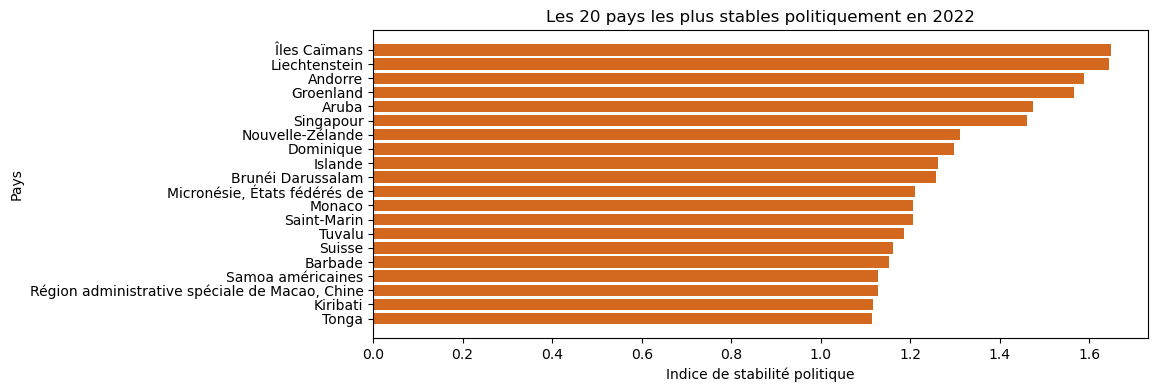

In [12]:
# Affichage des 20 pays les plus stables politiquement en 2022

# Trie de la valeur par ordre décroissant
stab_poli_2022_desc = df_stab_poli3.sort_values('stab_poli_2022', ascending=False)

# Sélection des 20 premiers pays
stab_poli_top20 = stab_poli_2022_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(stab_poli_top20['Pays'], stab_poli_top20['stab_poli_2022'], color='chocolate')
plt.xlabel('Indice de stabilité politique')
plt.ylabel('Pays')
plt.title('Les 20 pays les plus stables politiquement en 2022')
plt.gca().invert_yaxis()

plt.show()

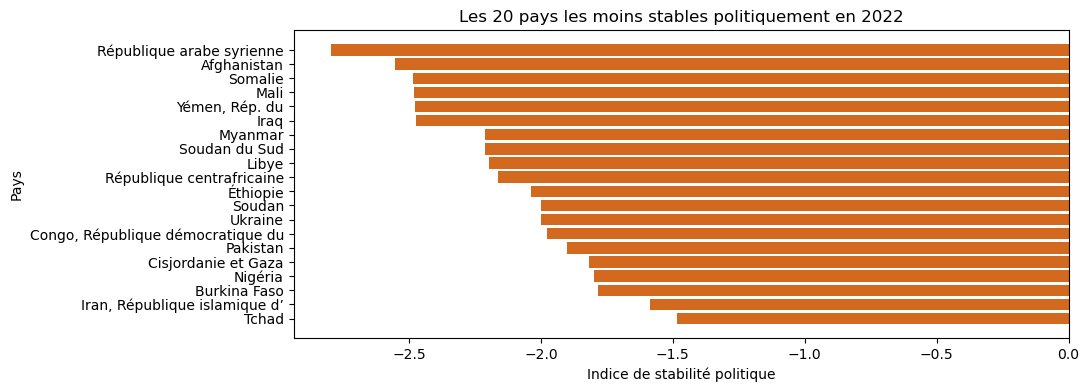

In [13]:
# Affichage des 20 pays les moins stables politiquement en 2022

# Trie de la valeur par ordre croissant
stab_poli_2022_asc = df_stab_poli3.sort_values('stab_poli_2022')

# Sélection des 20 derniers pays
stab_poli_flop20 = stab_poli_2022_asc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(stab_poli_flop20['Pays'], stab_poli_flop20['stab_poli_2022'], color='chocolate')
plt.xlabel('Indice de stabilité politique')
plt.ylabel('Pays')
plt.title('Les 20 pays les moins stables politiquement en 2022')
plt.gca().invert_yaxis()

plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.2 - Analyse économique : PIB par habitant</h3>
</div>

In [14]:
## Il s'agit du PIB par habitant entre 2010 et 2023.
## Le PIB par habitant, exprimé en dollars américains courants, mesure la richesse produite par habitant d'un pays.

## https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.CD

In [15]:
# Importation du fichier 'pib_hab'
df_pib_hab = pd.read_excel("pib_hab.xlsx")

In [16]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_pib_hab.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_pib_hab.shape[1]))

Le tableau comporte 217 observation(s) ou article(s)
Le tableau comporte 15 colonne(s)


In [17]:
# Identification de la nature des données dans chacune des colonnes
df_pib_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   2010          210 non-null    float64
 2   2011          213 non-null    float64
 3   2012          211 non-null    float64
 4   2013          211 non-null    float64
 5   2014          212 non-null    float64
 6   2015          210 non-null    float64
 7   2016          210 non-null    float64
 8   2017          210 non-null    float64
 9   2018          210 non-null    float64
 10  2019          211 non-null    float64
 11  2020          210 non-null    float64
 12  2021          209 non-null    float64
 13  2022          203 non-null    float64
 14  2023          186 non-null    float64
dtypes: float64(14), object(1)
memory usage: 25.6+ KB


In [18]:
# Affichage des 5 premières lignes de la table
display(df_pib_hab.head())

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,24452.588739,26043.156325,25611.175767,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Afghanistan,562.499222,608.738850,653.417475,638.733181,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
2,Angola,3586.663694,4608.155166,5083.826873,5061.349253,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620
3,Albanie,4094.349686,4437.141161,4247.631343,4413.063383,4578.633208,3952.803574,4124.055390,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041,8367.775731
4,Andorre,48237.891174,51428.196952,44902.380766,44747.753864,45680.534992,38885.530322,39931.216980,40632.231552,42904.828456,41328.600498,37207.221999,42066.490518,42350.697069,46544.720720


In [19]:
# Remplacement des NaN de la colonne 2023 par les valeurs des colonnes précédentes
df_pib_hab['2023'].fillna(df_pib_hab['2022'], inplace=True)
df_pib_hab['2023'].fillna(df_pib_hab['2021'], inplace=True)
df_pib_hab['2023'].fillna(df_pib_hab['2020'], inplace=True)
df_pib_hab['2023'].fillna(df_pib_hab['2019'], inplace=True)

In [20]:
# Création de df_pib_hab2 à partir de df_pib_hab en ne gardant que les colonnes pertinantes
df_pib_hab2 = df_pib_hab.loc[:, ['Country Name','2023']]

# Renommage de la colonne "Country Name" en "Pays"
df_pib_hab2 = df_pib_hab2.rename(columns={'Country Name': 'Pays'})

# Renommage de la colonne "2023" en "pib_hab_2023"
df_pib_hab2 = df_pib_hab2.rename(columns={'2023': 'pib_hab_2023'})

# Formatage des colonnes des années avec 3 chiffres après la virgule
df_pib_hab2['pib_hab_2023'] = df_pib_hab2['pib_hab_2023'].round(3)
    
# Affichage des 5 premières lignes de la table
display(df_pib_hab2.head())

,Pays,pib_hab_2023
0,Aruba,33300.839
1,Afghanistan,352.604
2,Angola,2309.522
3,Albanie,8367.776
4,Andorre,46544.721


In [21]:
# Vérification de la présence de NaN
if df_pib_hab2['pib_hab_2023'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'pib_hab_2023'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'pib_hab_2023'.")    

# Comptabilisation des valeurs manquantes
pib_hab2_nbr_nan = df_pib_hab2['pib_hab_2023'].isnull().sum()
print(pib_hab2_nbr_nan)

Il y a des valeurs manquantes (NaN) dans la colonne 'pib_hab_2023'.
6


In [22]:
pib_hab2_filtre_nan = df_pib_hab2[df_pib_hab2['pib_hab_2023'].isnull()]
print(pib_hab2_filtre_nan)

                                  Pays  pib_hab_2023
58                            Érythrée           NaN
71                           Gibraltar           NaN
158  Corée, République démocratique de           NaN
177                      Soudan du Sud           NaN
206                          Venezuela           NaN
207          Îles Vierges britanniques           NaN


In [23]:
df_pib_hab3 = df_pib_hab2.dropna()

In [24]:
df_pib_hab3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 216
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          211 non-null    object 
 1   pib_hab_2023  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


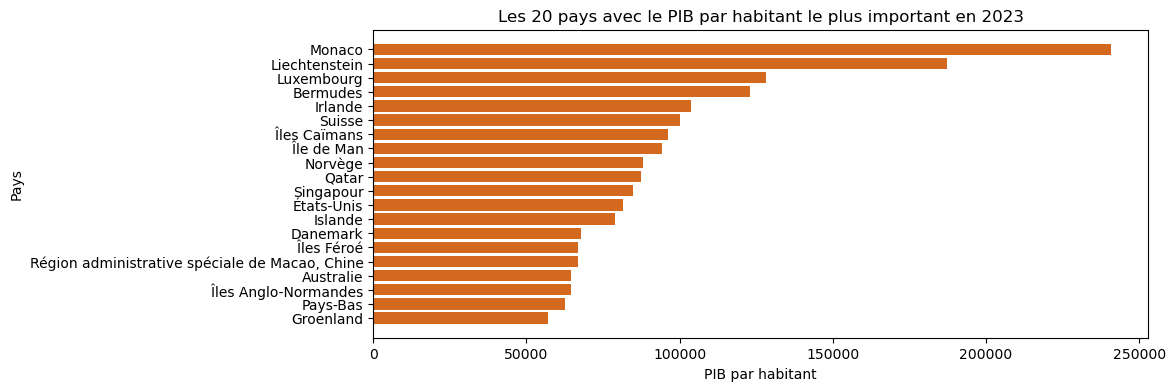

In [25]:
# Affichage des 20 pays avec le PIB par habitant le plus important en 2023

# Trie de la valeur par ordre décroissant
pib_hab_2023_desc = df_pib_hab3.sort_values('pib_hab_2023', ascending=False)

# Sélection des 20 premiers pays
pib_hab_top20 = pib_hab_2023_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pib_hab_top20['Pays'], pib_hab_top20['pib_hab_2023'], color='chocolate')
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Les 20 pays avec le PIB par habitant le plus important en 2023')
plt.gca().invert_yaxis()

plt.show()

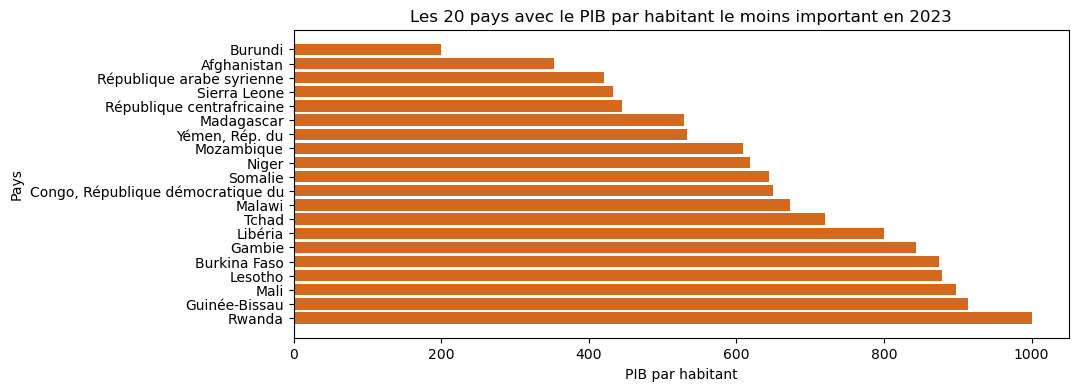

In [26]:
# Affichage des 20 pays avec le PIB par habitant le moins important en 2023*

# Trie de la valeur par ordre croissant
pib_hab_2023_asc = df_pib_hab3.sort_values('pib_hab_2023')

# Sélection des 20 premiers pays
pib_hab_flop20 = pib_hab_2023_asc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pib_hab_flop20['Pays'], pib_hab_flop20['pib_hab_2023'], color='chocolate')
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Les 20 pays avec le PIB par habitant le moins important en 2023')
plt.gca().invert_yaxis()

plt.show()

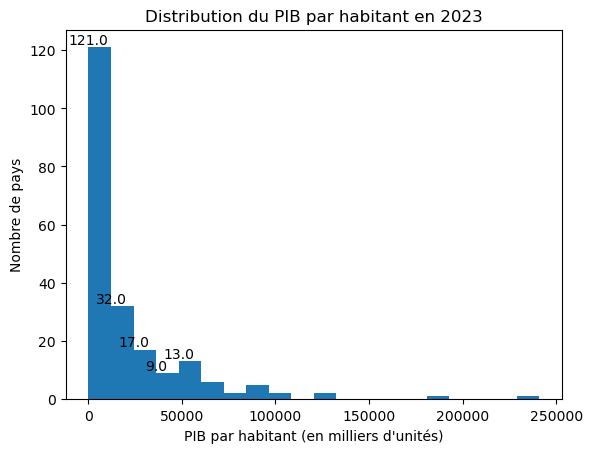

In [27]:
# Créer l'histogramme
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(df_pib_hab3['pib_hab_2023'], bins=20)

# Trier les barres par hauteur et prendre les 5 plus hautes
indices = np.argsort(counts)[-5:]

# Ajouter les étiquettes aux 5 barres les plus hautes
for i in indices:
    ax.text(bins[i], counts[i], str(counts[i]), ha='center', va='bottom', color = 'black')

# Personnalisation du graphique
plt.title("Distribution du PIB par habitant en 2023")
plt.xlabel("PIB par habitant (en milliers d'unités)")
plt.ylabel("Nombre de pays")
plt.grid(False)

# Afficher le graphique
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.2 - Analyse économique : croissance du PIB par habitant</h3>
</div>

In [28]:
# Il s'agit de la croissance du PIB par habitant en % annuel.

# Taux de pourcentage annuel de croissance du PIB par habitant basé sur les devises locales constantes.
# Le PIB par habitant est le produit intérieur brut divisé par la population en milieu d'année.
# Le PIB au prix des acheteurs est la somme de la valeur ajoutée brute de tous les producteurs résidents d'une économie plus toutes taxes sur les produits et moins les subventions non incluses dans la valeur des produits.
# Elle est calculée sans effectuer de déductions pour la dépréciation des biens fabriqués ou la perte de valeur ou la dégradation des ressources naturelles.
# Les données sont en dollars américains constants de 2010.

# https://donnees.banquemondiale.org/indicator/NY.GDP.PCAP.KD.ZG

In [29]:
# Importation du fichier 'pib_croi'
df_pib_croi = pd.read_excel("pib_croi.xlsx")

In [30]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_pib_croi.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_pib_croi.shape[1]))

Le tableau comporte 217 observation(s) ou article(s)
Le tableau comporte 15 colonne(s)


In [31]:
# Identification de la nature des données dans chacune des colonnes
df_pib_croi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   2010          208 non-null    float64
 2   2011          208 non-null    float64
 3   2012          208 non-null    float64
 4   2013          208 non-null    float64
 5   2014          209 non-null    float64
 6   2015          209 non-null    float64
 7   2016          208 non-null    float64
 8   2017          209 non-null    float64
 9   2018          210 non-null    float64
 10  2019          209 non-null    float64
 11  2020          208 non-null    float64
 12  2021          207 non-null    float64
 13  2022          201 non-null    float64
 14  2023          184 non-null    float64
dtypes: float64(14), object(1)
memory usage: 25.6+ KB


In [32]:
# Affichage des 5 premières lignes de la table
display(df_pib_croi.head())

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,-3.827864,2.402778,-1.839358,5.636971,-2.264869,-1.255589,1.121183,6.474909,1.876401,-2.743401,-24.084570,27.696865,10.553786,NaN
1,Afghanistan,11.099220,-3.211364,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,-8.586652,NaN
2,Angola,0.571221,-0.345062,4.538054,1.106331,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755,-2.155077
3,Albanie,4.223084,2.821642,1.584873,1.187234,1.985388,2.516827,3.480293,3.898112,4.276312,2.523541,-2.745239,9.922714,6.139017,4.633910
4,Andorre,1.222688,1.340894,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.003870,0.238297,-12.735078,6.459441,8.479470,1.109786


In [33]:
# Remplacement des NaN de la colonne 2023 par les valeurs des colonnes précédentes
df_pib_croi['2023'].fillna(df_pib_croi['2022'], inplace=True)
df_pib_croi['2023'].fillna(df_pib_croi['2021'], inplace=True)
df_pib_croi['2023'].fillna(df_pib_croi['2020'], inplace=True)
df_pib_croi['2023'].fillna(df_pib_croi['2019'], inplace=True)
df_pib_croi['2023'].fillna(df_pib_croi['2018'], inplace=True)

In [34]:
# Création de df_pib_croi2 à partir de df_pib_croi en ne gardant que les colonnes pertinantes
df_pib_croi2 = df_pib_croi.loc[:, ['Country Name','2023']]

# Renommage de la colonne "Country Name" en "Pays"
df_pib_croi2 = df_pib_croi2.rename(columns={'Country Name': 'Pays'})

# Renommage de la colonne "2023" en "pib_hab_2023"
df_pib_croi2 = df_pib_croi2.rename(columns={'2023': 'pib_croi_2023'})

# Formatage des colonnes des années avec 3 chiffres après la virgule
df_pib_croi2['pib_croi_2023'] = df_pib_croi2['pib_croi_2023'].round(3)
    
# Affichage des 5 premières lignes de la table
display(df_pib_croi2.head())

,Pays,pib_croi_2023
0,Aruba,10.554
1,Afghanistan,-8.587
2,Angola,-2.155
3,Albanie,4.634
4,Andorre,1.110


In [35]:
# Vérification de la présence de NaN
if df_pib_croi2['pib_croi_2023'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'pib_croi_2023'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'pib_croi_2023'.")    

# Comptabilisation des valeurs manquantes
pib_croi2_nbr_nan = df_pib_croi2['pib_croi_2023'].isnull().sum()
print(pib_croi2_nbr_nan)

Il y a des valeurs manquantes (NaN) dans la colonne 'pib_croi_2023'.
7


In [36]:
pib_croi2_filtre_nan = df_pib_croi2[df_pib_croi2['pib_croi_2023'].isnull()]
print(pib_croi2_filtre_nan)

                                  Pays  pib_croi_2023
58                            Érythrée            NaN
71                           Gibraltar            NaN
112                      Liechtenstein            NaN
158  Corée, République démocratique de            NaN
177                      Soudan du Sud            NaN
206                          Venezuela            NaN
207          Îles Vierges britanniques            NaN


In [37]:
df_pib_croi3 = df_pib_croi2.dropna()

In [38]:
df_pib_croi3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 216
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pays           210 non-null    object 
 1   pib_croi_2023  210 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


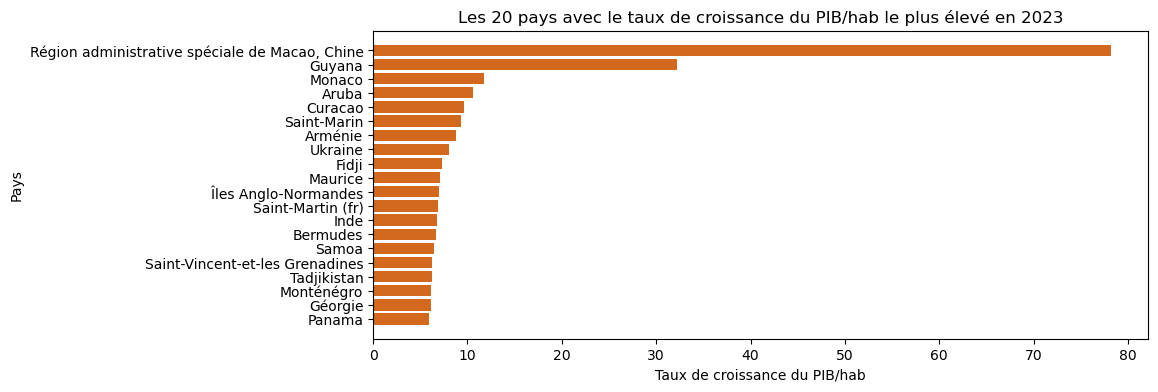

In [39]:
# Affichage des 20 pays avec le taux de croissance du PIB par habitant le plus important en 2023*

# Trie de la valeur par ordre décroissant
pib_croi_2023_desc = df_pib_croi3.sort_values('pib_croi_2023', ascending=False)

# Sélection des 20 premiers pays
pib_croi_top20 = pib_croi_2023_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pib_croi_top20['Pays'], pib_croi_top20['pib_croi_2023'], color='chocolate')
plt.xlabel('Taux de croissance du PIB/hab')
plt.ylabel('Pays')
plt.title('Les 20 pays avec le taux de croissance du PIB/hab le plus élevé en 2023')
plt.gca().invert_yaxis()

plt.show()

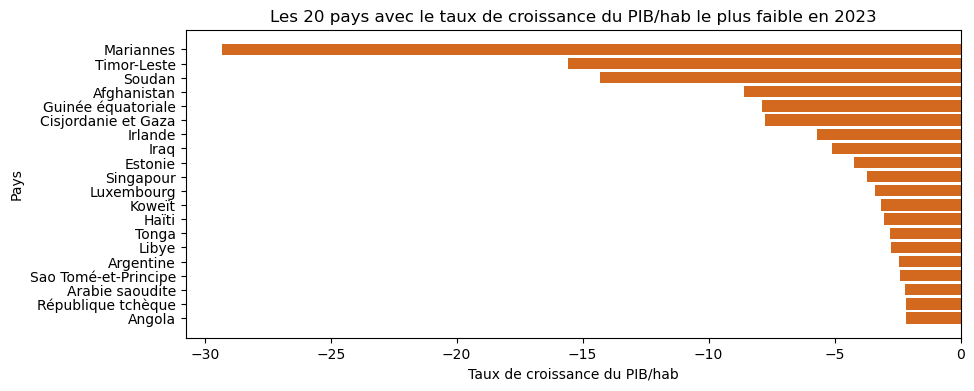

In [40]:
# Affichage des 20 pays avec le taux de croissance du PIB par habitant le plus faible en 2023*

# Trie de la valeur par ordre croissant
pib_croi_2023_asc = df_pib_croi3.sort_values('pib_croi_2023')

# Sélection des 20 premiers pays
pib_croi_flop20 = pib_croi_2023_asc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pib_croi_flop20['Pays'], pib_croi_flop20['pib_croi_2023'], color='chocolate')
plt.xlabel('Taux de croissance du PIB/hab')
plt.ylabel('Pays')
plt.title('Les 20 pays avec le taux de croissance du PIB/hab le plus faible en 2023')
plt.gca().invert_yaxis()

plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.2 - Analyse socio-culturelle : population</h3>
</div>

In [41]:
# Il s'agit du nombre d'habitants par pays en 2022 et en 2023, ainsi que de l'évolution entre ces 2 périodes

# https://www.populationpyramid.net/population-size-per-country/2022/

In [42]:
# Importation du fichier 'pop'
df_pop = pd.read_excel("pop.xlsx")

In [43]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_pop.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_pop.shape[1]))

Le tableau comporte 199 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [44]:
# Identification de la nature des données dans chacune des colonnes
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pays             199 non-null    object 
 1   pop_nbr_22       199 non-null    int64  
 2   pop_nbr_2023     199 non-null    int64  
 3   pop_evol%_22_23  199 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.3+ KB


In [45]:
# Affichage des 5 premières lignes de la table
display(df_pop.head())

,Pays,pop_nbr_22,pop_nbr_2023,pop_evol%_22_23
0,Inde,1425423213,1438069596,0.887202
1,Chine,1425179569,1422584933,-0.182057
2,Etats-Unis d'Amérique,341534046,343477335,0.568988
3,Indonésie,278830529,281190067,0.846227
4,Pakistan,243700667,247504496,1.560861


In [46]:
# Suppression de la colonne pop_nbr_22
df_pop = df_pop.drop('pop_nbr_22', axis=1)

In [47]:
# Vérification de la présence de NaN
if df_pop['pop_nbr_2023'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'pop_nbr_2023'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'pop_nbr_2023'.")

Il n'y a pas de valeurs manquantes dans la colonne 'pop_nbr_2023'.


In [48]:
# Vérification de la présence de NaN
if df_pop['pop_evol%_22_23'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'pop_evol%_22_23'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'pop_evol%_22_23'.")

Il n'y a pas de valeurs manquantes dans la colonne 'pop_evol%_22_23'.


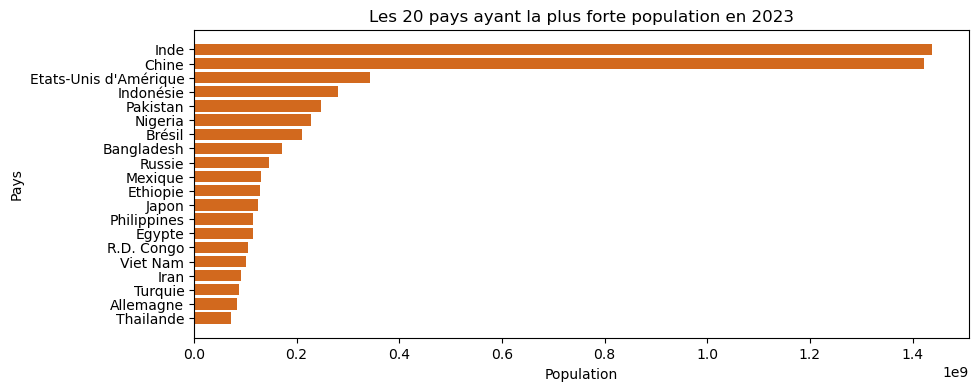

In [49]:
# Affichage des 20 pays ayant la plus forte population en 2023

# Trie de la valeur par ordre décroissant
pop_23_desc = df_pop.sort_values('pop_nbr_2023', ascending=False)

# Sélection des 20 premiers pays
pop_23_top20 = pop_23_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pop_23_top20['Pays'], pop_23_top20['pop_nbr_2023'], color='chocolate')
plt.xlabel('Population')
plt.ylabel('Pays')
plt.title('Les 20 pays ayant la plus forte population en 2023')
plt.gca().invert_yaxis()

plt.show()

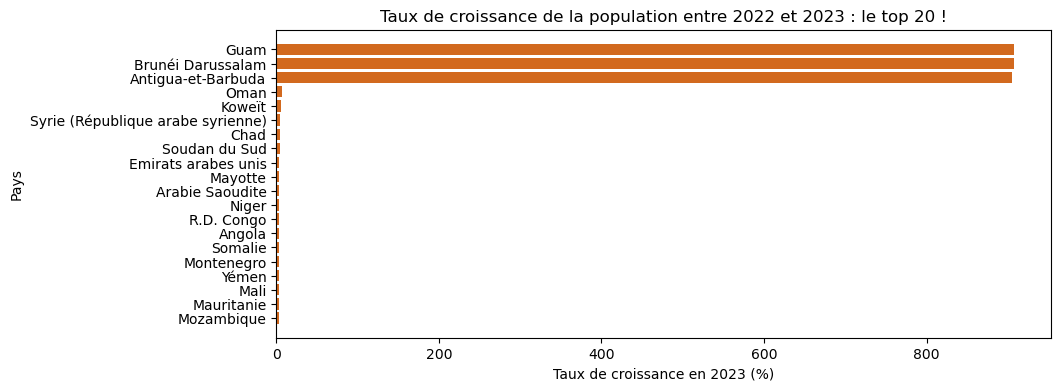

In [50]:
# Affichage des 20 pays ayant le plus fort taux de croissance de population entre 2022 et 2023

# Trie de la valeur par ordre décroissant
pop_evol_desc = df_pop.sort_values('pop_evol%_22_23', ascending=False)

# Sélection des 20 premiers pays
pop_evol_top20 = pop_evol_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pop_evol_top20['Pays'], pop_evol_top20['pop_evol%_22_23'], color='chocolate')
plt.xlabel('Taux de croissance en 2023 (%)')
plt.ylabel('Pays')
plt.title('Taux de croissance de la population entre 2022 et 2023 : le top 20 !')
plt.gca().invert_yaxis()

plt.show()

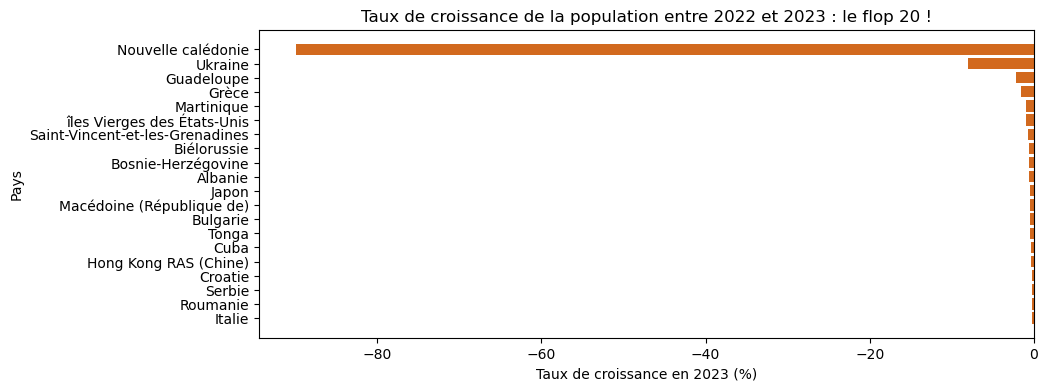

In [51]:
# Affichage des 20 pays ayant le plus faible taux de croissance de population entre 2022 et 2023

# Trie de la valeur par ordre croissante
pop_evol_asc = df_pop.sort_values('pop_evol%_22_23', ascending=True)

# Sélection des 20 premiers pays
pop_evol_flop20 = pop_evol_asc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(pop_evol_flop20['Pays'], pop_evol_flop20['pop_evol%_22_23'], color='chocolate')
plt.xlabel('Taux de croissance en 2023 (%)')
plt.ylabel('Pays')
plt.title('Taux de croissance de la population entre 2022 et 2023 : le flop 20 !')
plt.gca().invert_yaxis()

plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.3 - Analyse technologique : distance entre Paris et les capitales mondiales</h3>
</div>

In [52]:
# Il s'agit de la distance en KM entre Paris et les capitales mondiales
# Cette données peut être utile dans le cadre du transport de la volaille et de la non rupture de la chaîne du froid 

# https://apprendre5minutes.wordpress.com/2022/02/27/distance-entre-paris-et-les-capitales-du-monde/
# http://mag.bouts-du-monde.com/partir/distance.htm

In [53]:
# Importation du fichier 'distance'
df_distance = pd.read_excel("distance.xlsx")

In [54]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_distance.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_distance.shape[1]))

Le tableau comporte 197 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [55]:
# Identification de la nature des données dans chacune des colonnes
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pays         197 non-null    object
 1   Capitale     197 non-null    object
 2   Km de Paris  197 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


In [56]:
# Affichage des 5 premières lignes de la table
display(df_distance.head())

,Pays,Capitale,Km de Paris
0,Afghanistan,Kaboul,5581
1,Afrique du sud,Pretoria,8684
2,Albanie,Tirana,1601
3,Algérie,Alger,1914
4,Allemagne,Berlin,878


In [57]:
# Création de df_pop_nbr2 à partir de df_pop_nbr en ne gardant que les colonnes pertinantes
df_distance2 = df_distance.loc[:, ['Pays', 'Km de Paris']]

# Renommage de la colonne "Km de Paris" en "km_paris"
df_distance2 = df_distance2.rename(columns={'Km de Paris': 'km_paris'})
    
# Affichage des 5 premières lignes de la table
display(df_distance2.head())

,Pays,km_paris
0,Afghanistan,5581
1,Afrique du sud,8684
2,Albanie,1601
3,Algérie,1914
4,Allemagne,878


In [58]:
# Vérification de la présence de NaN
if df_distance2['km_paris'].isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans la colonne 'km_paris'.")
else:
    print("Il n'y a pas de valeurs manquantes dans la colonne 'km_paris'.")    

Il n'y a pas de valeurs manquantes dans la colonne 'km_paris'.


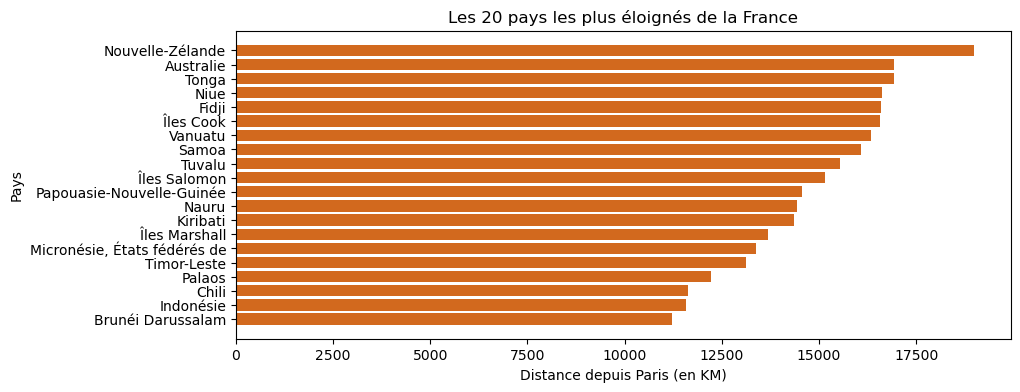

In [59]:
# Affichage des 20 pays les plus éloignés de la France

# Trie de la valeur par ordre décroissant
distance_desc = df_distance2.sort_values('km_paris', ascending=False)

# Sélection des 20 premiers pays
distance_loin20 = distance_desc.head(20)

# Création d'un diagramme à barres
plt.figure(figsize=(10, 4))
plt.barh(distance_loin20['Pays'], distance_loin20['km_paris'], color='chocolate')
plt.xlabel('Distance depuis Paris (en KM)')
plt.ylabel('Pays')
plt.title('Les 20 pays les plus éloignés de la France')
plt.gca().invert_yaxis()

plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.4 - Analyse environementale : ressources en volailles</h3>
</div>

In [60]:
# Il s'agit d'un fichier comportant différentes données realitves à la disponibilité alimenaires, dans le monde, en 2017.

# Fichier mis à ma disposition.

In [61]:
# Importation du fichier 'dispo_ali'
df_dispo_ali = pd.read_excel("dispo_ali.xlsx")

In [62]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_dispo_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_dispo_ali.shape[1]))

Le tableau comporte 176600 observation(s) ou article(s)
Le tableau comporte 14 colonne(s)


In [63]:
# Identification de la nature des données dans chacune des colonnes
df_dispo_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [64]:
df_dispo_ali

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [65]:
# Création de df_stab_poli2 à partir de df_stab_poli en ne gardant que les colonnes pertinantes
df_dispo_ali2 = df_dispo_ali.loc[:, ['Zone','Élément', 'Produit', 'Valeur']]

# Renommage de la colonne "Zone" en "Pays"
df_dispo_ali2 = df_dispo_ali2.rename(columns={'Zone': 'Pays'})

# Arrondissement des valeurs de la colonne "Valeur" à l'entier inférieur
df_dispo_ali2['Valeur'] = df_dispo_ali2['Valeur'].astype(int)
    
# Affichage des 5 premières lignes de la table
display(df_dispo_ali2.head())

,Pays,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281
1,Afghanistan,Importations - Quantité,Blé et produits,2302
2,Afghanistan,Variation de stock,Blé et produits,-119
3,Afghanistan,Exportations - Quantité,Blé et produits,0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701


In [66]:
# Affichage des valeurs uniques de la colonne "Description du Symbole"
dispo_ali2_produit_unique = df_dispo_ali2['Produit'].unique()

print(dispo_ali2_produit_unique)

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [67]:
# Filtrage des lignes où "Produit" est égal à "Viande de Volailles"
df_volailles = df_dispo_ali2[df_dispo_ali2['Produit'] == 'Viande de Volailles']

# Suppression de la colonne Produit
df_volailles = df_volailles.drop("Produit", axis=1)

# Affichage des 5 premières lignes de la table
display(df_volailles.head())

,Pays,Élément,Valeur
651,Afghanistan,Production,28
652,Afghanistan,Importations - Quantité,29
653,Afghanistan,Variation de stock,0
654,Afghanistan,Disponibilité intérieure,57
655,Afghanistan,Pertes,2


In [68]:
# Création de la table pivotante
df_volailles2 = pd.pivot_table(df_volailles, index='Pays', columns='Élément', values='Valeur')

display(df_volailles2.head())

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.0,0.0,0.0,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.0,9.0,14.0,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.0,6.0,6.0,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.0,1.0,1.0,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.0,4.0,7.0,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [69]:
# Liste des colonnes à supprimer
volailles_supp = ['Alimentation pour touristes', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Nourriture', 'Pertes', 'Résidus', 'Semences', 'Traitement', 'Variation de stock', 'Disponibilité intérieure']

# Suppression des colonnes
df_volailles2 = df_volailles2.drop(volailles_supp, axis=1)

# Réinitialisation de l'index pour que 'Pays' devienne une colonne
df_volailles2.reset_index(inplace=True)

display(df_volailles2.head())

Élément,Pays,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,0.0,NaN,29.0,28.0
1,Afrique du Sud,14.0,63.0,514.0,1667.0
2,Albanie,6.0,0.0,38.0,13.0
3,Algérie,1.0,0.0,2.0,275.0
4,Allemagne,7.0,646.0,842.0,1514.0


In [70]:
# Vérifier la présence de NaN dans tout le DataFrame
if df_volailles2.isnull().values.any():
    print("Il y a des valeurs manquantes (NaN) dans le DataFrame df_volailles.")
else:
    print("Il n'y a pas de valeurs manquantes dans le DataFrame df_volailles.")

Il y a des valeurs manquantes (NaN) dans le DataFrame df_volailles.


In [71]:
volailles2_nbr_nan = df_volailles2.isnull().sum().sum()
print("Il y a", volailles2_nbr_nan, "valeurs manquantes dans le DataFrame.")

Il y a 43 valeurs manquantes dans le DataFrame.


In [72]:
volailles2_lignes_nan = df_volailles2[df_volailles2.isnull().any(axis=1)]
print(volailles2_lignes_nan)

Élément                                   Pays  \
0                                  Afghanistan   
13                                     Bahamas   
14                                  Bangladesh   
23                                Burkina Faso   
26                                  Cabo Verde   
27                                    Cambodge   
40                                        Cuba   
43                                    Djibouti   
54                                      Gambie   
56                                     Grenade   
59                                      Guinée   
60                               Guinée-Bissau   
63                                       Haïti   
80                                    Kiribati   
89                                  Madagascar   
91                                      Malawi   
92                                    Maldives   
93                                        Mali   
97                                  Mauritanie   


In [73]:
df_volailles3 = df_volailles2.dropna()

In [74]:
df_volailles3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1 to 171
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Pays                                                      135 non-null    object 
 1   Disponibilité de protéines en quantité (g/personne/jour)  135 non-null    float64
 2   Exportations - Quantité                                   135 non-null    float64
 3   Importations - Quantité                                   135 non-null    float64
 4   Production                                                135 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


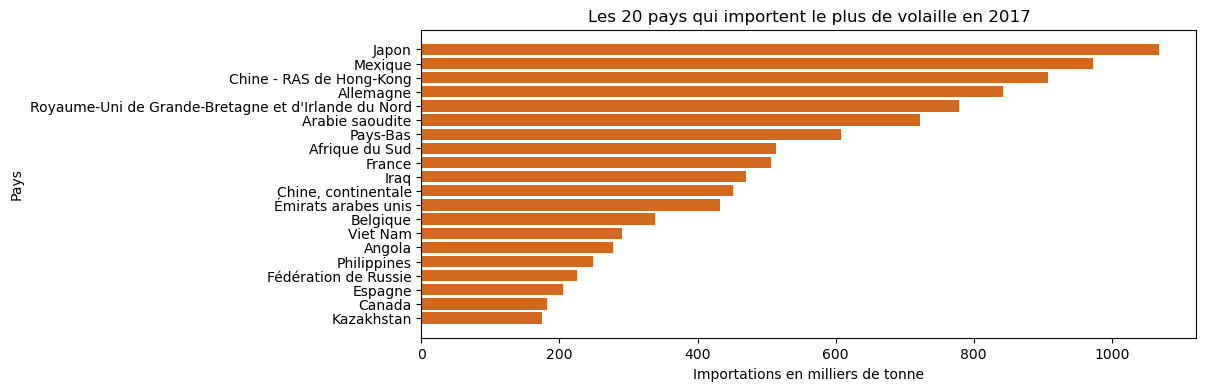

In [75]:
# Affichage des 10 pays qui importe le plus de volaille en 2017

# Trie de la valeur des importations par ordre décroissant
volailles3_impor_desc = df_volailles3.sort_values('Importations - Quantité', ascending=False)

# Selection des 10 premiers pays
volailles3_impor_top10 = volailles3_impor_desc.head(20)

# Création d'un diagramme à barre
plt.figure(figsize=(10, 4))
plt.barh(volailles3_impor_top10['Pays'], volailles3_impor_top10['Importations - Quantité'], color='chocolate')
plt.xlabel('Importations en milliers de tonne')
plt.ylabel('Pays')
plt.title('Les 20 pays qui importent le plus de volaille en 2017')
plt.gca().invert_yaxis()
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II.6 - Analyse légale</h3>
</div>

In [76]:
# ///

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">III - JOINTURES</h3>
</div>

In [77]:
# Jonction 1
df_merged1 = pd.merge(df_stab_poli3, df_pib_hab3, how='outer', indicator=True)
display(df_merged1.head())

,Pays,stab_poli_2022,pib_hab_2023,_merge
0,Aruba,1.475,33300.839,both
1,Afghanistan,-2.551,352.604,both
2,Angola,-0.646,2309.522,both
3,Albanie,0.115,8367.776,both
4,Andorre,1.588,46544.721,both


In [78]:
# Information df_merged1
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pays            215 non-null    object  
 1   stab_poli_2022  205 non-null    float64 
 2   pib_hab_2023    211 non-null    float64 
 3   _merge          215 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 5.5+ KB


In [79]:
# Suppression de la colonne de contrôle _merge
df_merged1 = df_merged1.drop('_merge', axis=1)

In [80]:
# Jonction 2
df_merged2 = pd.merge(df_merged1, df_pib_croi3, how='outer', indicator=True)
display(df_merged2.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,_merge
0,Aruba,1.475,33300.839,10.554,both
1,Afghanistan,-2.551,352.604,-8.587,both
2,Angola,-0.646,2309.522,-2.155,both
3,Albanie,0.115,8367.776,4.634,both
4,Andorre,1.588,46544.721,1.110,both


In [81]:
# Information df_merged2
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pays            215 non-null    object  
 1   stab_poli_2022  205 non-null    float64 
 2   pib_hab_2023    211 non-null    float64 
 3   pib_croi_2023   210 non-null    float64 
 4   _merge          215 non-null    category
dtypes: category(1), float64(3), object(1)
memory usage: 7.2+ KB


In [82]:
# Suppression de la colonne de contrôle _merge
df_merged2 = df_merged2.drop('_merge', axis=1)

In [83]:
# Remplacement des noms de Pays
df_pop['Pays'] = df_pop['Pays'].replace('Etats-Unis d\'Amérique', 'États-Unis')
df_pop['Pays'] = df_pop['Pays'].replace('Nigeria', 'Nigéria')
df_pop['Pays'] = df_pop['Pays'].replace('Russie', 'Fédération de Russie')
df_pop['Pays'] = df_pop['Pays'].replace('Ethiopie', 'Éthiopie')
df_pop['Pays'] = df_pop['Pays'].replace('Egypte', 'Égypte, République arabe d’')                             
df_pop['Pays'] = df_pop['Pays'].replace('R.D. Congo', 'Congo, République démocratique du')
df_pop['Pays'] = df_pop['Pays'].replace('Iran', 'Iran, République islamique d’')
df_pop['Pays'] = df_pop['Pays'].replace('Thailande', 'Thaïlande')                             
df_pop['Pays'] = df_pop['Pays'].replace('Royaume Uni', 'Royaume-Uni')                                          
df_pop['Pays'] = df_pop['Pays'].replace('Corée du sud (République de Corée)', 'Corée, République de') 
df_pop['Pays'] = df_pop['Pays'].replace('Uganda', 'Ouganda')  
df_pop['Pays'] = df_pop['Pays'].replace('Irak', 'Iraq')
df_pop['Pays'] = df_pop['Pays'].replace('Yémen', 'Yémen, Rép. du')
df_pop['Pays'] = df_pop['Pays'].replace('Arabie Saoudite', 'Arabie saoudite')                                
df_pop['Pays'] = df_pop['Pays'].replace('Corée du Nord', 'Corée, République démocratique de')                
df_pop['Pays'] = df_pop['Pays'].replace('Syrie (République arabe syrienne)', 'République arabe syrienne')                                         
df_pop['Pays'] = df_pop['Pays'].replace('Chad', 'Tchad')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Equateur', 'Équateur')
df_pop['Pays'] = df_pop['Pays'].replace('Haiti', 'Haïti')
df_pop['Pays'] = df_pop['Pays'].replace('République Dominicaine', 'République dominicaine')
df_pop['Pays'] = df_pop['Pays'].replace('République Tchèque', 'République tchèque')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Emirats arabes unis', 'Émirats arabes unis')                                          
df_pop['Pays'] = df_pop['Pays'].replace('Biélorussie', 'Bélarus')
df_pop['Pays'] = df_pop['Pays'].replace('Israel', 'Israël')
df_pop['Pays'] = df_pop['Pays'].replace('Laos', 'République démocratique populaire lao')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Hong Kong RAS (Chine)', 'Chine, RAS de Hong Kong')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Turkmenistan', 'Turkménistan')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Kyrgyzstan', 'République kirghize')
df_pop['Pays'] = df_pop['Pays'].replace('Salvador', 'El Salvador')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Congo', 'Congo, République du')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Slovaquie', 'République slovaque')                                         
df_pop['Pays'] = df_pop['Pays'].replace('Liberia', 'Libéria')
df_pop['Pays'] = df_pop['Pays'].replace('Palestine (État de)', 'Cisjordanie et Gaza')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Eritrea', 'Érythrée')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Puerto Rico', 'Porto Rico')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Moldavie (République de)', 'Moldova')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Lithuanie', 'Lituanie') 
df_pop['Pays'] = df_pop['Pays'].replace('Macédoine (République de)', 'Macédoine du Nord')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Guinée Equatoriale', 'Guinée équatoriale')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Mauritius', 'Maurice')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Swaziland', 'Eswatini')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Iles Solomon', 'Îles Salomon') 
df_pop['Pays'] = df_pop['Pays'].replace('Bhutan', 'Bhoutan')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Macao RAS (Chine)', 'Région administrative spéciale de Macao, Chine')
df_pop['Pays'] = df_pop['Pays'].replace('Montenegro', 'Monténégro')                                        
df_pop['Pays'] = df_pop['Pays'].replace('Cap vert', 'Cabo Verde')
df_pop['Pays'] = df_pop['Pays'].replace('Curaçao', 'Curacao')
df_pop['Pays'] = df_pop['Pays'].replace('Micronésie', 'Micronésie, États fédérés de')
df_pop['Pays'] = df_pop['Pays'].replace('Saint-Vincent-et-les-Grenadines', 'Saint-Vincent-et-les Grenadines')                                        
df_pop['Pays'] = df_pop['Pays'].replace('îles Vierges des États-Unis', 'Îles Vierges (EU)')
df_pop['Pays'] = df_pop['Pays'].replace('Birmanie (Myanmar)', 'Myanmar')
df_pop['Pays'] = df_pop['Pays'].replace('Nouvelle calédonie', 'Nouvelle-Calédonie')

                                        #df_pop['Pays'] = df_pop['Pays'].replace('Guadeloupe', 'xxx')
                                        #df_pop['Pays'] = df_pop['Pays'].replace('Martinique', 'xxx')                                        
                                       # df_pop['Pays'] = df_pop['Pays'].replace('Mayotte', 'xxx')                                        
                                       #df_pop['Pays'] = df_pop['Pays'].replace('Guinée française', 'xxx')
                                        #df_pop['Pays'] = df_pop['Pays'].replace('Nouvelle calédonie', 'xxx')
                                        #df_pop['Pays'] = df_pop['Pays'].replace('Sahara occidental', 'xxx')                                        
                                       #df_pop['Pays'] = df_pop['Pays'].replace('Réunion', 'xxx')                                        
                                                                                
                                        

In [84]:
# Jonction 3
df_merged3 = pd.merge(df_merged2, df_pop, how='outer', indicator=True)
display(df_merged3.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,_merge
0,Aruba,1.475,33300.839,10.554,107939.0,0.145664,both
1,Afghanistan,-2.551,352.604,-8.587,41454761.0,2.158561,both
2,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,both
3,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,both
4,Andorre,1.588,46544.721,1.110,NaN,NaN,left_only


In [85]:
# Information df_merged3
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pays             221 non-null    object  
 1   stab_poli_2022   205 non-null    float64 
 2   pib_hab_2023     211 non-null    float64 
 3   pib_croi_2023    210 non-null    float64 
 4   pop_nbr_2023     199 non-null    float64 
 5   pop_evol%_22_23  199 non-null    float64 
 6   _merge           221 non-null    category
dtypes: category(1), float64(5), object(1)
memory usage: 10.8+ KB


In [86]:
# Comptabilisation du nombre de lignes où "_merge" est égal à "both"
df_merged3_nbr_both = df_merged3['_merge'].value_counts()['both']

print("Nombre de lignes avec '_merge' = 'both' :", df_merged3_nbr_both)

Nombre de lignes avec '_merge' = 'both' : 193


In [87]:
# Filtre des lignes où "_merge" est égal à "right_only"
df_merged3_right = df_merged3[df_merged3['_merge'] == 'right_only']

# Extraction des valeurs de la colonne "Pays" 
merged3_liste_right = df_merged3_right['Pays'].tolist()

# Affichage de la liste des pays
print(merged3_liste_right)

['Réunion', 'Sahara occidental', 'Guadeloupe', 'Martinique', 'Mayotte', 'Guinée française']


In [88]:
# Filtre des lignes où "_merge" est égal à "left_only"
df_merged3_left = df_merged3[df_merged3['_merge'] == 'left_only']

# Extraction des valeurs de la colonne "Pays" 
merged3_liste_left = df_merged3_left['Pays'].tolist()

# Affichage de la liste des pays
print(merged3_liste_left)

['Andorre', 'Samoa américaines', 'Bermudes', 'Îles Caïmans', 'Dominique', 'Groenland', 'Saint-Kitts-et-Nevis', 'Liechtenstein', 'Monaco', 'Îles Marshall', 'Nauru', 'Palaos', 'Saint-Marin', 'Tuvalu', 'Kosovo', 'Îles Anglo-Normandes', 'Îles Féroé', 'Île de Man', 'Saint-Martin (fr)', 'Mariannes', 'Sint Maarten (Dutch part)', 'Îles Turques-et-Caïques']


In [89]:
df_merged3_bis = df_merged3[df_merged3['_merge'] == 'both']

In [90]:
# Suppression de la colonne de contrôle _merge
df_merged3_bis = df_merged3_bis.drop('_merge', axis=1)

In [91]:
# Remplacement des noms de Pays
df_distance2['Pays'] = df_distance2['Pays'].replace('Afrique du sud', 'Afrique du Sud')
df_distance2['Pays'] = df_distance2['Pays'].replace('ex', 'Antilles néerlandaises (ex)')
df_distance2['Pays'] = df_distance2['Pays'].replace('Niue', 'Nioué')
df_distance2['Pays'] = df_distance2['Pays'].replace('République Centrafricaine', 'République centrafricaine')
df_distance2['Pays'] = df_distance2['Pays'].replace('République du Congo', 'Congo, République du')
df_distance2['Pays'] = df_distance2['Pays'].replace('République Tchèque', 'République tchèque')
df_distance2['Pays'] = df_distance2['Pays'].replace('Salvador', 'El Salvador')
df_distance2['Pays'] = df_distance2['Pays'].replace('Soudan du sud', 'Soudan du Sud')
df_distance2['Pays'] = df_distance2['Pays'].replace('Côte d\'ivoire', 'Côte d\'Ivoire')
df_distance2['Pays'] = df_distance2['Pays'].replace('Yémen, Rép. Du', 'Yémen, Rép. du')

In [92]:
# Jonction 4
df_merged4 = pd.merge(df_merged3_bis, df_distance2, how='outer', indicator=True)
display(df_merged4.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,km_paris,_merge
0,Aruba,1.475,33300.839,10.554,107939.0,0.145664,NaN,left_only
1,Afghanistan,-2.551,352.604,-8.587,41454761.0,2.158561,5581.0,both
2,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,6503.0,both
3,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,1601.0,both
4,Émirats arabes unis,0.701,52976.808,2.581,10642081.0,3.905395,5240.0,both


In [93]:
# Information df_merged4
df_merged4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pays             208 non-null    object  
 1   stab_poli_2022   190 non-null    float64 
 2   pib_hab_2023     189 non-null    float64 
 3   pib_croi_2023    189 non-null    float64 
 4   pop_nbr_2023     193 non-null    float64 
 5   pop_evol%_22_23  193 non-null    float64 
 6   km_paris         197 non-null    float64 
 7   _merge           208 non-null    category
dtypes: category(1), float64(6), object(1)
memory usage: 11.8+ KB


In [94]:
# Comptabilisation du nombre de lignes où "_merge" est égal à "both"
df_merged4_nbr_both = df_merged4['_merge'].value_counts()['both']

print("Nombre de lignes avec '_merge' = 'both' :", df_merged4_nbr_both)

Nombre de lignes avec '_merge' = 'both' : 182


In [95]:
# Filtre des lignes où "_merge" est égal à "right_only"
df_merged4_right = df_merged4[df_merged4['_merge'] == 'right_only']

# Extraction des valeurs de la colonne "Pays" 
merged4_liste_right = df_merged4_right['Pays'].tolist()

# Affichage de la liste des pays
print(merged4_liste_right)

['Andorre', 'Birmanie', 'Dominique', 'Antilles néerlandaises (ex)', 'Îles Cook', 'Îles Marshall', 'Liechtenstein', 'Monaco', 'Nauru', 'Nioué', 'Palaos', 'Saint-Christophe-et-Niévès', 'Saint-Marin', 'Tuvalu', 'Vatican']


In [96]:
# Filtre des lignes où "_merge" est égal à "left_only"
df_merged4_left = df_merged4[df_merged4['_merge'] == 'left_only']

# Extraction des valeurs de la colonne "Pays" 
merged4_liste_left = df_merged4_left['Pays'].tolist()

# Affichage de la liste des pays
print(merged4_liste_left)

['Aruba', 'Guam', 'Chine, RAS de Hong Kong', 'Kazakhstan', 'Région administrative spéciale de Macao, Chine', 'Myanmar', 'Porto Rico', 'Îles Vierges (EU)', 'Curacao', 'Nouvelle-Calédonie', 'Polynésie française']


In [97]:
# Suppression de la colonne de contrôle _merge
df_merged4 = df_merged4.drop('_merge', axis=1)

In [98]:
# Remplacement des noms de Pays
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Bolivie (État plurinational de)', 'Bolivie')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Chine - RAS de Hong-Kong', 'Chine, RAS de Hong Kong')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Chine - RAS de Macao', 'Région administrative spéciale de Macao, Chine')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Chine, continentale', 'Chine')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Congo', 'Congo, République du')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Iran (République islamique d\')', 'Iran, République islamique d’')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Kirghizistan', 'République kirghize')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Royaume-Uni')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('République de Corée', 'Corée, République de')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('République de Moldova', 'Moldova')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('République populaire démocratique de Corée', 'Corée, République démocratique de')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('République-Unie de Tanzanie', 'Tanzanie')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Slovaquie', 'République slovaque')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Tchéquie', 'République tchèque')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Venezuela (République bolivarienne du)', 'Venezuela')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Yémen', 'Yémen, Rép. du')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('Égypte', 'Égypte, République arabe d’')
df_volailles3.loc[:, 'Pays'] = df_volailles3['Pays'].replace('États-Unis d\'Amérique', 'États-Unis')

In [99]:
# Jonction 5
df_cocorico = pd.merge(df_merged4, df_volailles3, how='outer', indicator=True)
display(df_cocorico.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,_merge
0,Aruba,1.475,33300.839,10.554,107939.0,0.145664,NaN,NaN,NaN,NaN,NaN,left_only
1,Afghanistan,-2.551,352.604,-8.587,41454761.0,2.158561,5581.0,NaN,NaN,NaN,NaN,left_only
2,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,6503.0,3.0,0.0,277.0,42.0,both
3,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,1601.0,6.0,0.0,38.0,13.0,both
4,Émirats arabes unis,0.701,52976.808,2.581,10642081.0,3.905395,5240.0,14.0,94.0,433.0,48.0,both


In [100]:
# Information df_cocorico
df_cocorico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Pays                                                      210 non-null    object  
 1   stab_poli_2022                                            190 non-null    float64 
 2   pib_hab_2023                                              189 non-null    float64 
 3   pib_croi_2023                                             189 non-null    float64 
 4   pop_nbr_2023                                              193 non-null    float64 
 5   pop_evol%_22_23                                           193 non-null    float64 
 6   km_paris                                                  197 non-null    float64 
 7   Disponibilité de protéines en quantité (g/personne/jour)  135 non-null    float64 
 8   Exportatio

In [101]:
# Comptabilisation du nombre de pays uniques
cocorico_nbr_pays = df_cocorico['Pays'].nunique()

print("Il y a", cocorico_nbr_pays, "pays uniques dans le dataset.")

Il y a 210 pays uniques dans le dataset.


In [102]:
# Filtre des lignes où "_merge" est égal à "right_only"
df_cocorico_right = df_cocorico[df_cocorico['_merge'] == 'right_only']

# Extraction des valeurs de la colonne "Pays" 
cocorico_liste_right = df_cocorico_right['Pays'].tolist()

# Affichage de la liste des pays
print(cocorico_liste_right)

['Chine, Taiwan Province de', 'Saint-Kitts-et-Nevis']


In [103]:
# Filtre des lignes où "_merge" est égal à "left_only"
df_cocorico_left = df_cocorico[df_cocorico['_merge'] == 'left_only']

# Extraction des valeurs de la colonne "Pays" 
cocorico_liste_left = df_cocorico_left['Pays'].tolist()

# Affichage de la liste des pays
print(cocorico_liste_left)

['Aruba', 'Afghanistan', 'Burundi', 'Burkina Faso', 'Bangladesh', 'Bahreïn', 'Bahamas', 'Brunéi Darussalam', 'Bhoutan', 'République centrafricaine', 'Congo, République démocratique du', 'Comores', 'Cabo Verde', 'Cuba', 'Djibouti', 'Érythrée', 'Éthiopie', 'Micronésie, États fédérés de', 'Guinée', 'Gambie', 'Guinée-Bissau', 'Guinée équatoriale', 'Grenade', 'Guam', 'Haïti', 'Cambodge', 'Kiribati', 'République démocratique populaire lao', 'Libye', 'Sainte-Lucie', 'Madagascar', 'Maldives', 'Mali', 'Mongolie', 'Mozambique', 'Mauritanie', 'Malawi', 'Népal', 'Papouasie-Nouvelle-Guinée', 'Porto Rico', 'Cisjordanie et Gaza', 'Qatar', 'Soudan', 'Singapour', 'Somalie', 'Soudan du Sud', 'Sao Tomé-et-Principe', 'Seychelles', 'République arabe syrienne', 'Tadjikistan', 'Turkménistan', 'Timor-Leste', 'Tonga', 'Tanzanie', 'Ouzbékistan', 'Saint-Vincent-et-les Grenadines', 'Îles Vierges (EU)', 'Vanuatu', 'Zimbabwe', 'Curacao', 'Nouvelle-Calédonie', 'Andorre', 'Birmanie', 'Antilles néerlandaises (ex)', 'Î

In [104]:
# Suppression de la colonne de contrôle _merge
df_cocorico = df_cocorico.drop('_merge', axis=1)

In [105]:
display(df_cocorico.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Aruba,1.475,33300.839,10.554,107939.0,0.145664,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-2.551,352.604,-8.587,41454761.0,2.158561,5581.0,NaN,NaN,NaN,NaN
2,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,6503.0,3.0,0.0,277.0,42.0
3,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,1601.0,6.0,0.0,38.0,13.0
4,Émirats arabes unis,0.701,52976.808,2.581,10642081.0,3.905395,5240.0,14.0,94.0,433.0,48.0


In [106]:
# Identification des valeurs manquantes
if df_cocorico.isnull().values.any():
    print("Il y a des valeurs manquantes dans le df.")
else:
    print("Il n'y a pas de valeurs manquantes dans le df.")

# Comptabilisation de nombre de valeurs manquantes par colonne :
cocorico_nan = df_cocorico.isnull().sum()
print(cocorico_nan)

Il y a des valeurs manquantes dans le df.
Pays                                                         0
stab_poli_2022                                              20
pib_hab_2023                                                21
pib_croi_2023                                               21
pop_nbr_2023                                                17
pop_evol%_22_23                                             17
km_paris                                                    13
Disponibilité de protéines en quantité (g/personne/jour)    75
Exportations - Quantité                                     75
Importations - Quantité                                     75
Production                                                  75
dtype: int64


In [107]:
# Suppression de toutes les lignes contenant au moins un NaN
df_cocorico2 = df_cocorico.dropna()

In [108]:
# Réinitialisation de l'index du df
df_cocorico3 = df_cocorico2.reset_index(drop=True)

In [109]:
# Identification des valeurs manquantes
if df_cocorico3.isnull().values.any():
    print("Il y a des valeurs manquantes dans le df.")
else:
    print("Il n'y a pas de valeurs manquantes dans le df.")

# Comptabilisation de nombre de valeurs manquantes par colonne :
cocorico_nan = df_cocorico3.isnull().sum()
print(cocorico_nan)

Il n'y a pas de valeurs manquantes dans le df.
Pays                                                        0
stab_poli_2022                                              0
pib_hab_2023                                                0
pib_croi_2023                                               0
pop_nbr_2023                                                0
pop_evol%_22_23                                             0
km_paris                                                    0
Disponibilité de protéines en quantité (g/personne/jour)    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Production                                                  0
dtype: int64


In [110]:
# Information df_cocorico
df_cocorico3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Pays                                                      125 non-null    object 
 1   stab_poli_2022                                            125 non-null    float64
 2   pib_hab_2023                                              125 non-null    float64
 3   pib_croi_2023                                             125 non-null    float64
 4   pop_nbr_2023                                              125 non-null    float64
 5   pop_evol%_22_23                                           125 non-null    float64
 6   km_paris                                                  125 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)  125 non-null    float64
 8   Exportations - Quant

In [111]:
df_cocorico3

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,6503.0,3.0,0.0,277.0,42.0
1,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,1601.0,6.0,0.0,38.0,13.0
2,Émirats arabes unis,0.701,52976.808,2.581,10642081.0,3.905395,5240.0,14.0,94.0,433.0,48.0
3,Argentine,-0.009,13730.515,-2.436,45538401.0,0.287388,11051.0,13.0,207.0,8.0,2161.0
4,Arménie,-0.797,8715.765,8.798,2943393.0,2.170105,3431.0,5.0,0.0,35.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
120,Viet Nam,-0.031,4346.768,4.332,100352192.0,0.673688,9193.0,4.0,1.0,291.0,918.0
121,Samoa,1.079,4139.030,6.413,216663.0,0.651302,16083.0,21.0,0.0,17.0,0.0
122,"Yémen, Rép. du",-2.477,533.367,-1.722,39390799.0,3.055560,5313.0,3.0,0.0,78.0,168.0
123,Afrique du Sud,-0.722,6253.162,-0.265,63212384.0,1.336959,8684.0,14.0,63.0,514.0,1667.0


In [112]:
# Exportation du df au format CSV
df_cocorico3.to_csv('cocorico.csv', index=False)

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">PARTIE 2 dans le notebook suivant</h3>
</div>